# PCA vs autoencoder con MNIST

In [1]:
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

2025-02-17 16:30:34.603061: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-17 16:30:34.603627: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-17 16:30:34.607577: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-17 16:30:34.617428: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739831434.634502   13928 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739831434.63

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data() #cargar los datos de MNIST

In [3]:
#normalizar las imagenes a [0,1], ya no se necesita min max scaler ya que es lo mismo
X_train = X_train.astype(np.float32) / 255.0
X_test = X_test.astype(np.float32) / 255.0


In [4]:
# Aplanar imágenes 28x28 a vectores de 784 dimensiones, por que pca solo acepta vectores y no matrices
X_train_flat = X_train.reshape(-1, 28*28)
X_test_flat = X_test.reshape(-1, 28*28)


In [5]:
#PCA
pca = PCA(n_components = 10) #disminuir la dimensionalidad de 784 a 10
X_train_pca = pca.fit_transform(X_train_flat)
X_test_pca = pca.transform(X_test_flat)

In [6]:
#entrada y espacio latente
input_dim = X_train_pca.shape[1]  # 10 componentes principales
encoding_dim = 10 #tamaño del espacio latente (igual a n_components de PCA)

In [7]:
autoencoder = Sequential([
    # Codificador
    Dense(100, input_shape=(input_dim,), activation="linear"),   #primera capa densa con 100 neuronas
    Dense(75, activation="relu"), 
    Dense(50, activation="relu"),


    Dense(encoding_dim, activation="relu"),    #capa de codificación, espacio latente
    
    # Decodificador
    Dense(75, activation="relu"), #expande la representación comprimida
    Dense(100, activation="relu"),
    Dense(input_dim, activation="linear")  
])

/home/maripau/Documents/ITESO/Semestre6/Deep/my_venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-02-17 16:30:37.317684: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [8]:
autoencoder.compile(optimizer=Adam(), loss="mean_squared_error")

In [9]:
history = autoencoder.fit(
    x = X_train_pca,
    y = X_train_pca,
    epochs = 30,
    batch_size = 10,
    shuffle = True,
    verbose = 1,
    validation_data=(X_test_pca, X_test_pca))

Epoch 1/30
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.3177 - val_loss: 0.1018
Epoch 2/30
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.0896 - val_loss: 0.0813
Epoch 3/30
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.0775 - val_loss: 0.0732
Epoch 4/30
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 0.0719 - val_loss: 0.0689
Epoch 5/30
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.0675 - val_loss: 0.0666
Epoch 6/30
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.0657 - val_loss: 0.0638
Epoch 7/30
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.0634 - val_loss: 0.0612
Epoch 8/30
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.0605 - val_loss: 0.0344
Epoch 9/30
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.0336 - val_loss: 0.0278
Epoch 10/30
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.0297 - val_loss: 0.0274
Epoch 11/30
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.0283 - val_loss: 0.0332
Epoch 12/30
6000/6000 ━━━━━━━━

In [10]:
encoder = Sequential(autoencoder.layers[:1])

In [11]:
X_encoded = encoder.predict(X_test_pca) #predice una representación de menor dimensión
X_encoded.shape

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step


(10000, 100)

In [12]:
X_encoded[0:10]

array([[-9.08186194e-03, -2.26303302e-02, -5.29052578e-02,
         3.70903701e-01, -6.88703358e-02, -2.16300376e-02,
        -1.82620704e+00, -1.89273637e-02,  3.60725075e-02,
        -1.90941524e-02, -3.91111262e-02,  6.99375868e-02,
        -4.09007035e-02, -2.35701799e-02,  1.82536936e+00,
         1.89713806e-01,  4.63986486e-01, -6.32590661e-03,
        -8.01656544e-02, -4.57191467e-02, -5.58961689e-01,
         1.92321241e-02, -3.23839784e-02, -3.71267162e-02,
        -5.52445538e-02, -2.28853012e-03,  9.81729664e-03,
        -5.02328575e-02, -3.22634876e-02, -6.32631704e-02,
        -7.83902407e-01, -4.90689836e-02, -1.91121012e-01,
        -4.43718955e-02, -1.91990342e-02,  4.16939333e-02,
        -4.14237350e-01, -4.46695387e-02, -6.87996596e-02,
        -4.63782027e-02, -7.01349881e-03,  4.68917238e-03,
        -1.16795506e-02, -4.03735563e-02, -5.24235750e-03,
         3.55040981e-03, -2.35981531e-02,  1.39470641e-02,
         1.40001565e-01, -7.45443553e-02,  6.45797104e-0

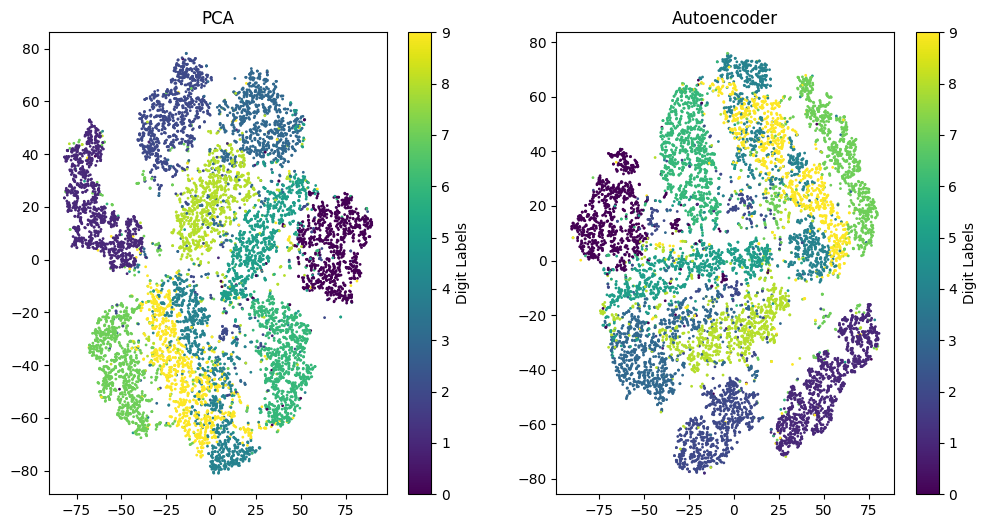

In [14]:
from sklearn.manifold import TSNE

# Reducir dimensionalidad con t-SNE para visualización en 2D
tsne_pca = TSNE(n_components=2, perplexity=30, random_state=42)
X_test_pca_2d = tsne_pca.fit_transform(X_test_pca)

tsne_auto = TSNE(n_components=2, perplexity=30, random_state=42)
X_encoded_2d = tsne_auto.fit_transform(X_encoded)

#datos en 2D
plt.figure(figsize=(12, 6))

# PCA
plt.subplot(1, 2, 1)
plt.scatter(X_test_pca_2d[:, 0], X_test_pca_2d[:, 1], c=y_test, cmap='viridis', s=1)
plt.title("PCA")
plt.colorbar(label="Digit Labels")

# Autoencoder
plt.subplot(1, 2, 2)
plt.scatter(X_encoded_2d[:, 0], X_encoded_2d[:, 1], c=y_test, cmap='viridis', s=1)
plt.title("Autoencoder")
plt.colorbar(label="Digit Labels")

plt.show()
